# Linear Estimation with Least Squares, Total Least Squares and RANSAC

### Importing the Libraries 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as myPlot
import seaborn as sns
from math import sqrt
from math import log
import numpy.linalg as la
import math
import random

### Importing the Dataset 

In [108]:
myData1=np.load('data1_new.pkl')
myData2=np.load('data2_new.pkl')
myData3=np.load('data3_new.pkl')

In [109]:
array1=np.array(myData1)
array2=np.array(myData2)
array3=np.array(myData3)

In [110]:
x1=array1[:,0]; y1=array1[:,1]
x2=array2[:,0]; y2=array2[:,1]
x3=array3[:,0]; y3=array3[:,1]

### Visualizing the Dataset

<function matplotlib.pyplot.show(*args, **kw)>

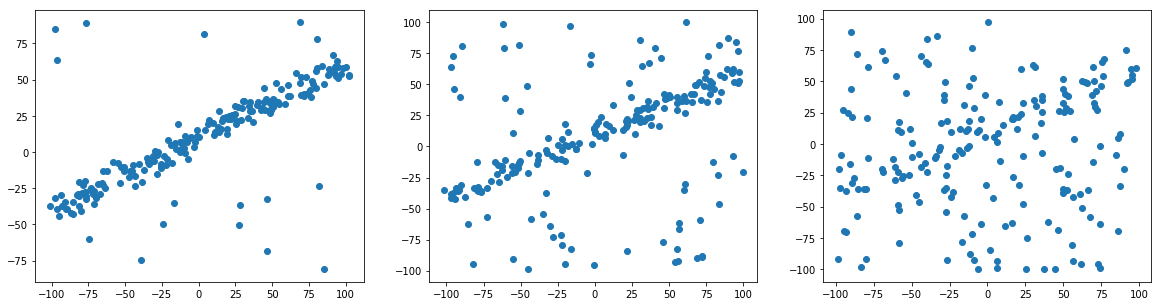

In [111]:
myPlot.figure(figsize=(20, 5))
myPlot.subplots_adjust(wspace=0.2,hspace=0.2)
myPlot.subplot(1,3,1)
myPlot.scatter(x1,y1)
myPlot.subplot(1,3,2)
myPlot.scatter(x2,y2)
myPlot.subplot(1,3,3)
myPlot.scatter(x3,y3)
myPlot.show

## Covariance and Eigen Values

In [112]:
def cov(x, y):
    xbar, ybar = x.mean(), y.mean()
    return np.sum((x - xbar)*(y - ybar))/(len(x) - 1)

In [113]:
def cov_mat(X):
    return np.array([[cov(X[0], X[0]), cov(X[0], X[1])], \
                     [cov(X[1], X[0]), cov(X[1], X[1])]])

Covariance Matrix

In [114]:
cov_mat(array1.T)
cov_mat(array2.T)
cov_mat(array3.T)

array([[3086.14137209,  326.06544037],
       [ 326.06544037, 2369.3509072 ]])

Eigen Values

In [115]:
e_val1,e_vec1=np.linalg.eig(cov_mat(array1.T))
e_val2,e_vec2=np.linalg.eig(cov_mat(array2.T))
e_val3,e_vec3=np.linalg.eig(cov_mat(array3.T))

<function matplotlib.pyplot.show(*args, **kw)>

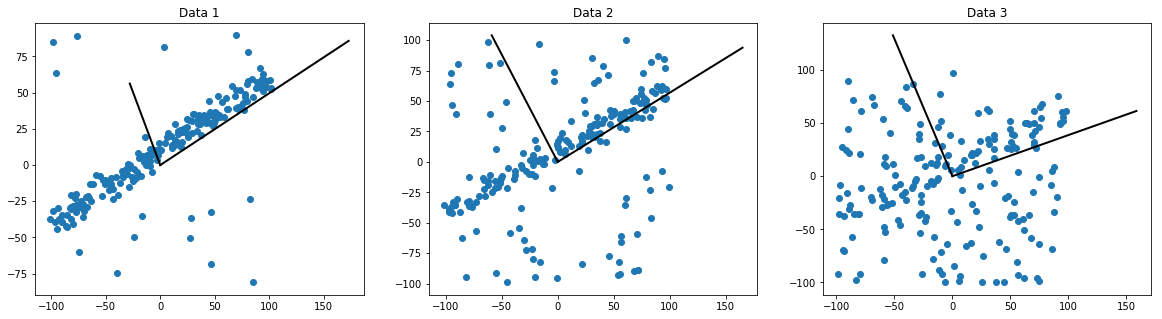

In [117]:
myPlot.figure(figsize=(20, 5))
myPlot.subplots_adjust(wspace=0.2,hspace=0.2)

myPlot.subplot(1,3,1)
myPlot.scatter(array1[:, 0], array1[:, 1])
myPlot.title('Data 1')
for e, v in zip(e_val1, e_vec1.T):
    myPlot.plot([0, 3*np.sqrt(e)*v[0]], [0, 3*np.sqrt(e)*v[1]],'k-', lw=2)

myPlot.subplot(1,3,2)
myPlot.scatter(array2[:, 0], array2[:, 1])
myPlot.title('Data 2')
for e, v in zip(e_val2, e_vec2.T):
    myPlot.plot([0, 3*np.sqrt(e)*v[0]], [0, 3*np.sqrt(e)*v[1]],'k-', lw=2)

myPlot.subplot(1,3,3)
myPlot.scatter(array3[:, 0], array3[:, 1])
myPlot.title('Data 3')
for e, v in zip(e_val3, e_vec3.T):
    myPlot.plot([0, 3*np.sqrt(e)*v[0]], [0, 3*np.sqrt(e)*v[1]],'k-', lw=2)
myPlot.show

## Least Squares (Vertical)

In [119]:
ones=np.ones(len(x1))
ones.reshape(-1,1).shape

(200, 1)

In [120]:
x1.reshape(-1,1).shape
x2.reshape(-1,1).shape
x3.reshape(-1,1).shape

(200, 1)

In [121]:
X1=np.transpose((x1,ones))
X2=np.transpose((x2,ones))
X3=np.transpose((x3,ones))

In [122]:
Y1=np.transpose(y1)
Y2=np.transpose(y2)
Y3=np.transpose(y3)
Y1.reshape(-1,1).shape
Y2.reshape(-1,1).shape
Y3.reshape(-1,1).shape

(200, 1)

In [123]:
B1=np.linalg.inv((np.transpose(X1)).dot(X1)).dot((np.transpose(X1).dot(Y1)))
B2=np.linalg.inv((np.transpose(X2)).dot(X2)).dot((np.transpose(X2).dot(Y2)))
B3=np.linalg.inv((np.transpose(X3)).dot(X3)).dot((np.transpose(X3).dot(Y3)))
m1=B1[0];c1=B1[1]
m2=B2[0];c2=B2[1]
m3=B3[0];c3=B3[1]

In [124]:
xx=np.linspace(-100,100)
yy1=m1*xx + c1
yy2=m2*xx + c2
yy3=m3*xx + c3

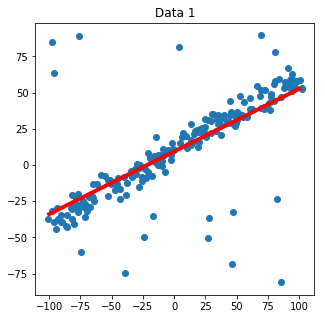

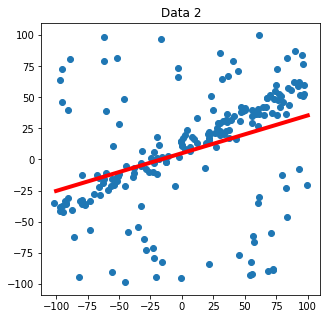

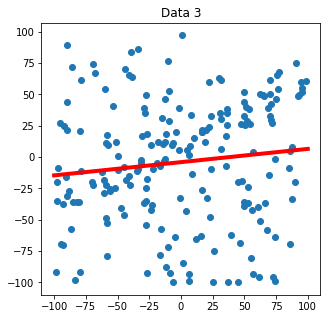

In [128]:
myPlot.figure(figsize=(5, 5))
myPlot.scatter(x1, y1) # actual
myPlot.plot(xx,yy1,color='red',lw=4)# predicted
myPlot.title('Data 1')
myPlot.show()

myPlot.figure(figsize=(5, 5))
myPlot.scatter(x2, y2) # actual
myPlot.plot(xx,yy2,color='red',lw=4) # predicted
myPlot.title('Data 2')
myPlot.show()

myPlot.figure(figsize=(5, 5))
myPlot.scatter(x3, y3) # actual
myPlot.plot(xx,yy3,color='red',lw=4) # predicted
myPlot.title('Data 3')
myPlot.show()

## Total Least Squares (Orthogonal)

In [129]:
x_mean1=np.mean(x1)
y_mean1=np.mean(y1)
x_mean2=np.mean(x2)
y_mean2=np.mean(y2)
x_mean3=np.mean(x3)
y_mean3=np.mean(y3)

In [130]:
w1=np.sum((y1-y_mean1)**2)-np.sum((x1-x_mean1)**2)
w2=np.sum((y2-y_mean2)**2)-np.sum((x2-x_mean2)**2)
w3=np.sum((y3-y_mean3)**2)-np.sum((x3-x_mean3)**2)
r1=2*(np.sum((x1-x_mean1).dot(y1-y_mean1)))
r2=2*(np.sum((x2-x_mean2).dot(y2-y_mean2)))
r3=2*(np.sum((x3-x_mean3).dot(y3-y_mean3)))

In [131]:
b1=(w1+(sqrt((w1**2)+(r1**2))))/r1
b2=(w2+(sqrt((w2**2)+(r2**2))))/r2
b3=(w3+(sqrt((w3**2)+(r3**2))))/r3
a1=y_mean1-b1*x_mean1
a2=y_mean2-b2*x_mean2
a3=y_mean3-b3*x_mean3

In [132]:
xx=np.linspace(-100,100)
yy1=b1*xx + a1
yy2=b2*xx + a2
yy3=b3*xx + a3

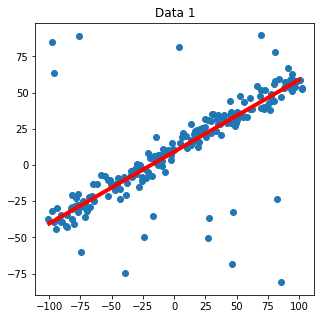

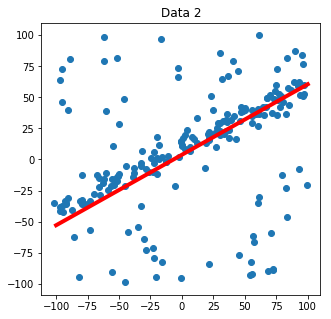

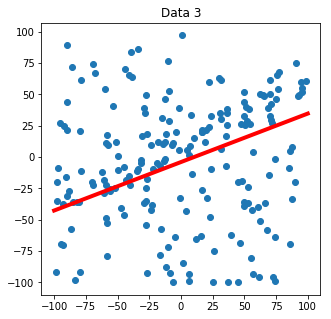

In [134]:
myPlot.figure(figsize=(5, 5))
myPlot.subplots_adjust(wspace=0.2,hspace=0.2)

myPlot.scatter(x1, y1) # actual
myPlot.plot(xx,yy1,color='red',lw=4) # predicted
myPlot.title('Data 1')
myPlot.show()

myPlot.figure(figsize=(5, 5))
myPlot.scatter(x2, y2) # actual
myPlot.plot(xx,yy2,color='red',lw=4) # predicted
myPlot.title('Data 2')
myPlot.show()

myPlot.figure(figsize=(5, 5))
myPlot.scatter(x3, y3) # actual
myPlot.plot(xx,yy3,color='red',lw=4) # predicted
myPlot.title('Data 3')
myPlot.show()

## RANSAC

In [34]:
p1=random.choice(array1)
p2=random.choice(array1)

In [190]:
N=1000
sample=0
best_in=[]
best_line=[]
while N>sample:
    p1=random.choice(array1)
    p2=random.choice(array1)
    inliers=[]
    for i in range(0,len(array1)):
        p0=array1[i] 
        dist=abs(((p2[1]-p1[1])*p0[0])-((p2[0]-p1[0])*p0[1])+(p2[0]*p1[1])-([p2[1]*p1[0]]))/(sqrt((p2[1]-p1[1])**2+(p2[0]-p1[0])**2))
        t=10
        if dist<t:
            inliers.append(array1[i])
    if len(inliers)>len(best_in):
        best_in=inliers
        best_line=[(p1[0],p2[0]),(p1[1],p2[1])]
    e=1-(len(inliers)/len(array1))
    N=(log(e))/(log(1-(1-e)**2))
    sample+=1

In [191]:
x=[]
y=[]
for i in best_in:
    x.append(i[0])
    y.append(i[1])

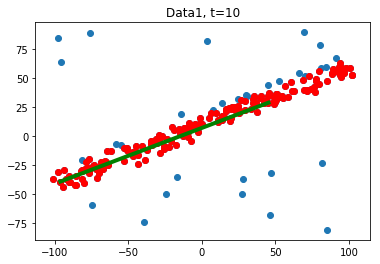

In [192]:
myPlot.scatter(x1,y1)
myPlot.scatter(x,y,color='red')
myPlot.title('Data1, t=10')
myPlot.plot(best_line[0],best_line[1],color='green',lw=4)

#### Data 2 

In [153]:
N=1000
sample=0
best_in=[]
best_line=[]
while N>sample:
    p1=random.choice(array2)
    p2=random.choice(array2)
    inliers=[]
    for i in range(0,len(array2)):
        p0=array2[i] 
        dist=abs(((p2[1]-p1[1])*p0[0])-((p2[0]-p1[0])*p0[1])+(p2[0]*p1[1])-([p2[1]*p1[0]]))/(sqrt((p2[1]-p1[1])**2+(p2[0]-p1[0])**2))
        t=15
        if dist<t:
            inliers.append(array2[i])
    if len(inliers)>len(best_in):
        best_in=inliers
        best_line=[(p1[0],p2[0]),(p1[1],p2[1])]
    e=1-(len(inliers)/len(array1))
    N=(log(e))/(log(1-(1-e)**2))
    sample+=1

In [154]:
x=[]
y=[]
for i in best_in:
    x.append(i[0])
    y.append(i[1])

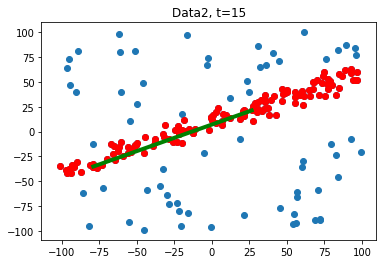

In [156]:
myPlot.scatter(x2,y2)
myPlot.scatter(x,y,color='red')
myPlot.title('Data2, t=15')
myPlot.plot(best_line[0],best_line[1],color='green',lw=4)

#### Data 3 

In [166]:
N=1000
sample=0
best_in=[]
best_line=[]
while N>sample:
    p1=random.choice(array3)
    p2=random.choice(array3)
    inliers=[]
    for i in range(0,len(array3)):
        p0=array3[i] 
        dist=abs(((p2[1]-p1[1])*p0[0])-((p2[0]-p1[0])*p0[1])+(p2[0]*p1[1])-([p2[1]*p1[0]]))/(sqrt((p2[1]-p1[1])**2+(p2[0]-p1[0])**2))
        t=20
        if dist<t:
            inliers.append(array3[i])
    if len(inliers)>len(best_in):
        best_in=inliers
        best_line=[(p1[0],p2[0]),(p1[1],p2[1])]
    e=1-(len(inliers)/len(array1))
    N=(log(e))/(log(1-(1-e)**2))
    sample+=1

In [167]:
x=[]
y=[]
for i in best_in:
    x.append(i[0])
    y.append(i[1])

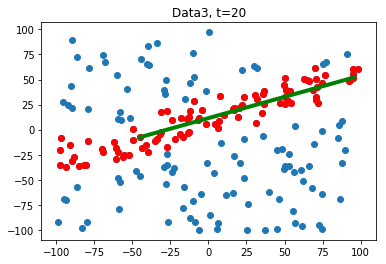

In [168]:
myPlot.scatter(x3,y3)
myPlot.scatter(x,y,color='red')
myPlot.title('Data3, t=20')
myPlot.plot(best_line[0],best_line[1],color='green',lw=4)